### Abalone Case Study

#### Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

#### Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

#### Name / Data Type / Measurement Unit / Description
----------------------------------------------------
Sex / nominal / -- / M, F, and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings / integer / -- / +1.5 gives the age in years. 

You have to predict the rings of each abalone which will lead us to the age of that abalone.

In [2]:
#Importing Necessory Libraries:

import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


#Preprocessing
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder

#Model Creation :
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.model_selection import cross_val_score

#Metrics:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [3]:
# Reading the CSV file:
df = pd.read_csv("abalone.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


By Checking the dataset we can conclude that, this dataset is about Abalone(marine snail). As the age of an abalone is related to its Rings we need to predict the number of the Rings to know the age of an Abalone. The number of Rings are also related to other charactesristics of an Abalone like Shell-weight,Length,Sex etc. There are 9 columns in this dataset, those are Sex, Length, Diameter, Height, Whole weight, Shucked weight, Viscera weight, Shell weight, Rings. Out of which 8 columns(Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight) are the feature data(independent variables) and 'Rings' is the label data(dependent variable)and as the label is a continuous type( number of the Rings is a descrete type of data) it is a "Regression" type of problem. Out of the 8 features, Sex is a categorical data(M-male,F-Female,I-Infant) and the rest of the features having float type of data.

In [4]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

After checking the data type of the dataset we can conclude that 9 columns i.e Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight are containing float type of data(Continuous), Sex is containing Object type(Categorical) of data and Rings(Label data) is containing integer type(discrete) of data.

In [5]:
df.shape

(4177, 9)

The dataset contains 4177 rows and 9 columns. It means this dataset is having records of 4177 number of Abalone and all the 8 features will be useful to predict the ring numbers which is useful to determine the age of each Abalone.

It's time to check the different column names:

In [6]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

Let's check the information of Features and the Labels:

In [7]:
df.info

<bound method DataFrame.info of      Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.141

Let's check the Statistics of the Dataset:

In [9]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


As we can see the count of each column is 4177,so there is no missing data present in the continuous variables. Each feature has different scale range. Statistically features are not exactly normally distributed,but close to normal distribution. Statistical value of each columns looking good except the min value of 'Height' i.e 0.000000, may be there is skewness, so we will check it and treat is if required. 

Let's check is there any missing data present in categorical variable(Sex) or not:

In [8]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

There is no missing data present in the Sex(Categorical data) column as well.

As the Sex Column is containing categorical data we should encode it to descrete data as we need it for analysis and may be for model training also. For that we are using LabelEncoder.

In [4]:
df['Sex']=LabelEncoder().fit_transform(df['Sex'])
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


After encoding with LabelEncoder the values of column 'Sex' is encoded into descrete values like, 
F (Feamale) - 0, I (Infant) - 1, M (Male)- 2

#### Univariate Analysis:

Let's Check the frequency of Male,Female and Infant in Sex column:

In [10]:
df['Sex'].value_counts()

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

As we can see in this dataset there is data of 1528 male Abalone(2), 1342 Infant Abalone(1) and 1307 female Abalone(0) present.

<AxesSubplot:xlabel='Sex', ylabel='count'>

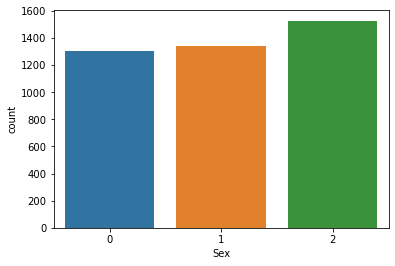

In [11]:
# Plotting each class frequency:

sns.countplot(df['Sex'])

We can conclude by seeing the visualization, the number of male Abalone is more than female and infant Abalone.

Let's Check the frequency of Rings regarding the count of all recorded Abalones:

In [12]:
print((df['Rings'].value_counts()/df['Rings'].value_counts().sum())*100)

9     16.495092
10    15.178358
8     13.598276
11    11.659085
7      9.360785
12     6.392147
6      6.200622
13     4.859947
14     3.016519
5      2.753172
15     2.465885
16     1.604022
17     1.388556
4      1.364616
18     1.005506
19     0.766100
20     0.622456
3      0.359109
21     0.335169
23     0.215466
22     0.143644
24     0.047881
27     0.047881
1      0.023941
25     0.023941
2      0.023941
26     0.023941
29     0.023941
Name: Rings, dtype: float64


So, 16.49% Abalonies have 9 Rings,15.17% are having 10 Rings, 13,59% are having 8 Rings,11.65% are having 11 Rings and 9.36% are having 7 Rings. Let's check the percentage by plotting a graph.

Text(0.5, 1.0, 'Cardinality of Ring column')

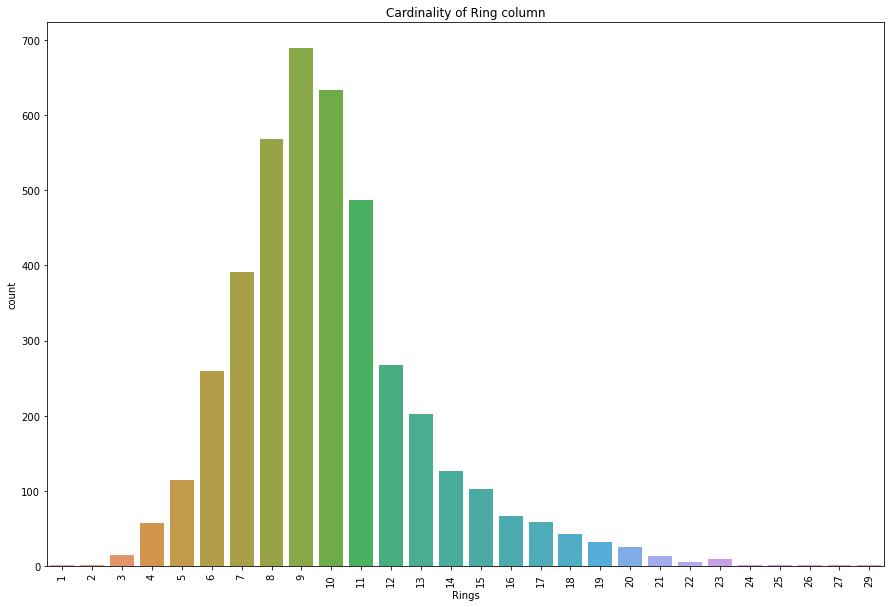

In [13]:
plt.figure(figsize=(15,10))
sns.countplot(df['Rings'])
plt.xticks(rotation=90)
plt.title('Cardinality of Ring column')

After seeing the graph we can say the number of rings measured in the data ranges from 1 to 29. Almost 700 Abalonies have 9 Rings; almost 650 Abalones have 10 Rings And most of the Abalones have 7-12 Rings.The distribution is slightly right skewed as well but this does not pose any specific problem for the further analysis.

Let's visualize how data is distributed for every continuous column:

In [5]:
# only taking the continuous features:
df_features = df[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight']]

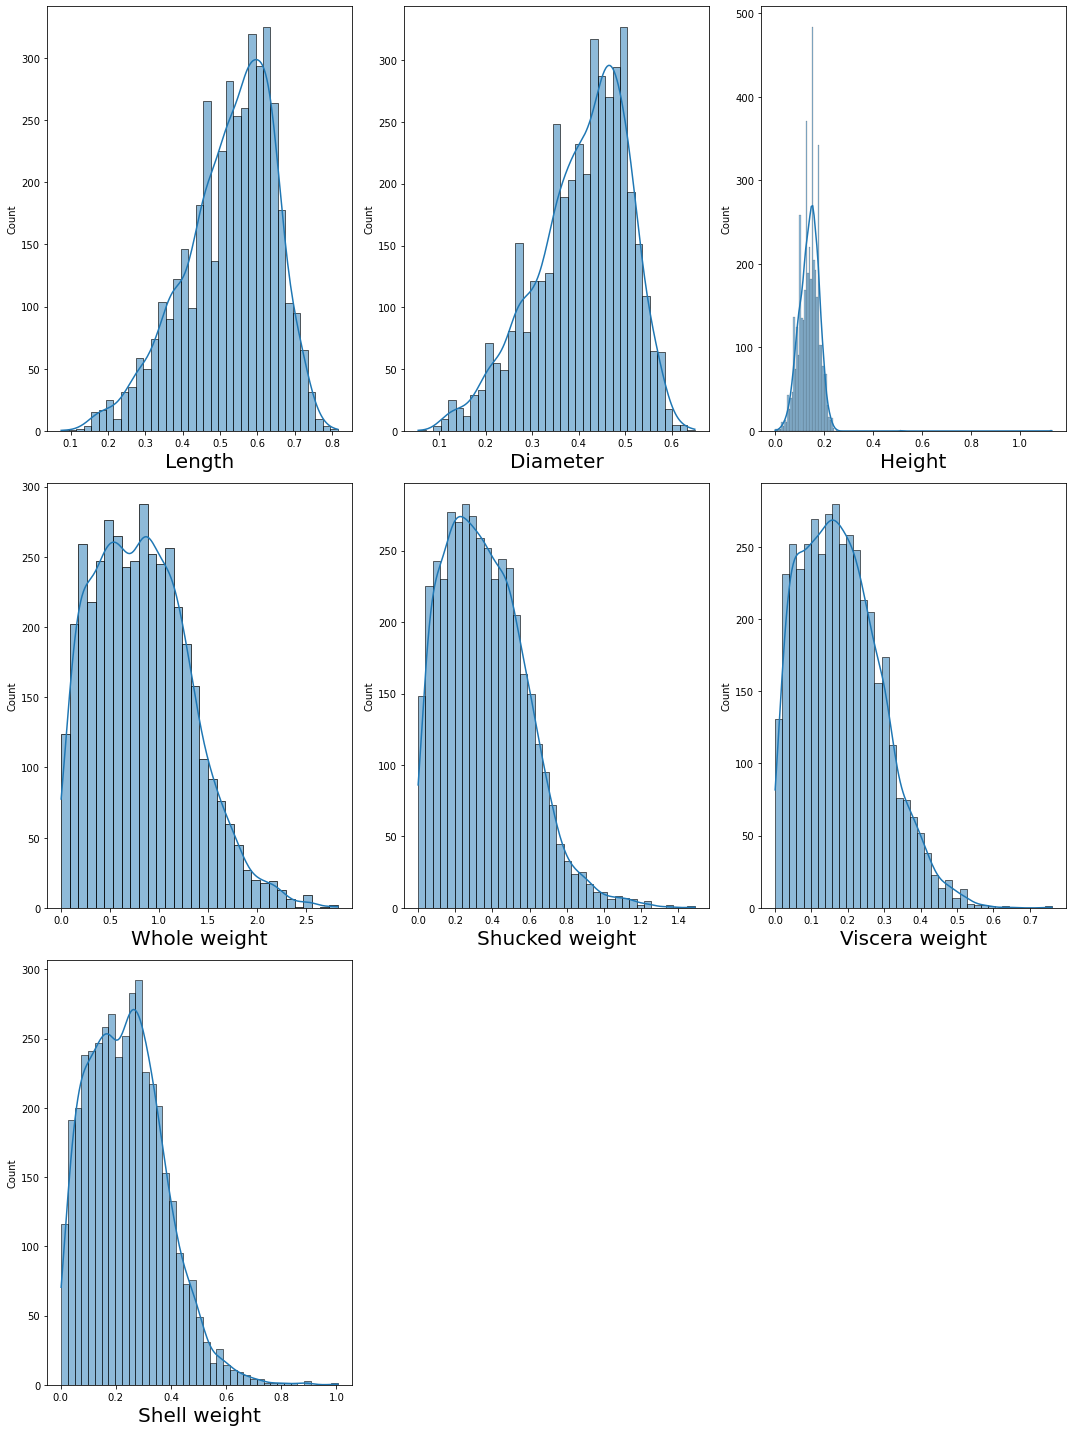

In [6]:
plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1
for column in df_features:
    if plotnumber<=8:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(df_features[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout() 

From above Histograms we can see that there is a little skewness in 'Height' data as 0 is not a possible 'Height'. And most of all data has little bit of Skewness. Mainly 'Whole weight','Shucked weight','Viscera weight', 'Shell weight' columns are little right skewed and 'Length', 'Diameter' columns are a bit left skewed. We will treat these skewness on the latter part. 

In [7]:
df_features.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
dtype: float64

As we can see 'Length' and 'Diameter' columns are little left skewed and 'Whole weight','Shucked weight' ,'Viscera weight', 'Shell weight' are little right skewed and 'Height' has very much skewness. Let's see how we can remove the skewness by using different methods.

#### Bivariate Analysis and Multivariate Analysis:

To see the relationship between Feature Vs label we need to Divide the data into Featues and Labels.


Dividing the dataset into features  and label:

In [8]:
y = df['Rings']
x = df.drop(columns=['Rings'])
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


Now let's check the relations between Features and Label(Rings):

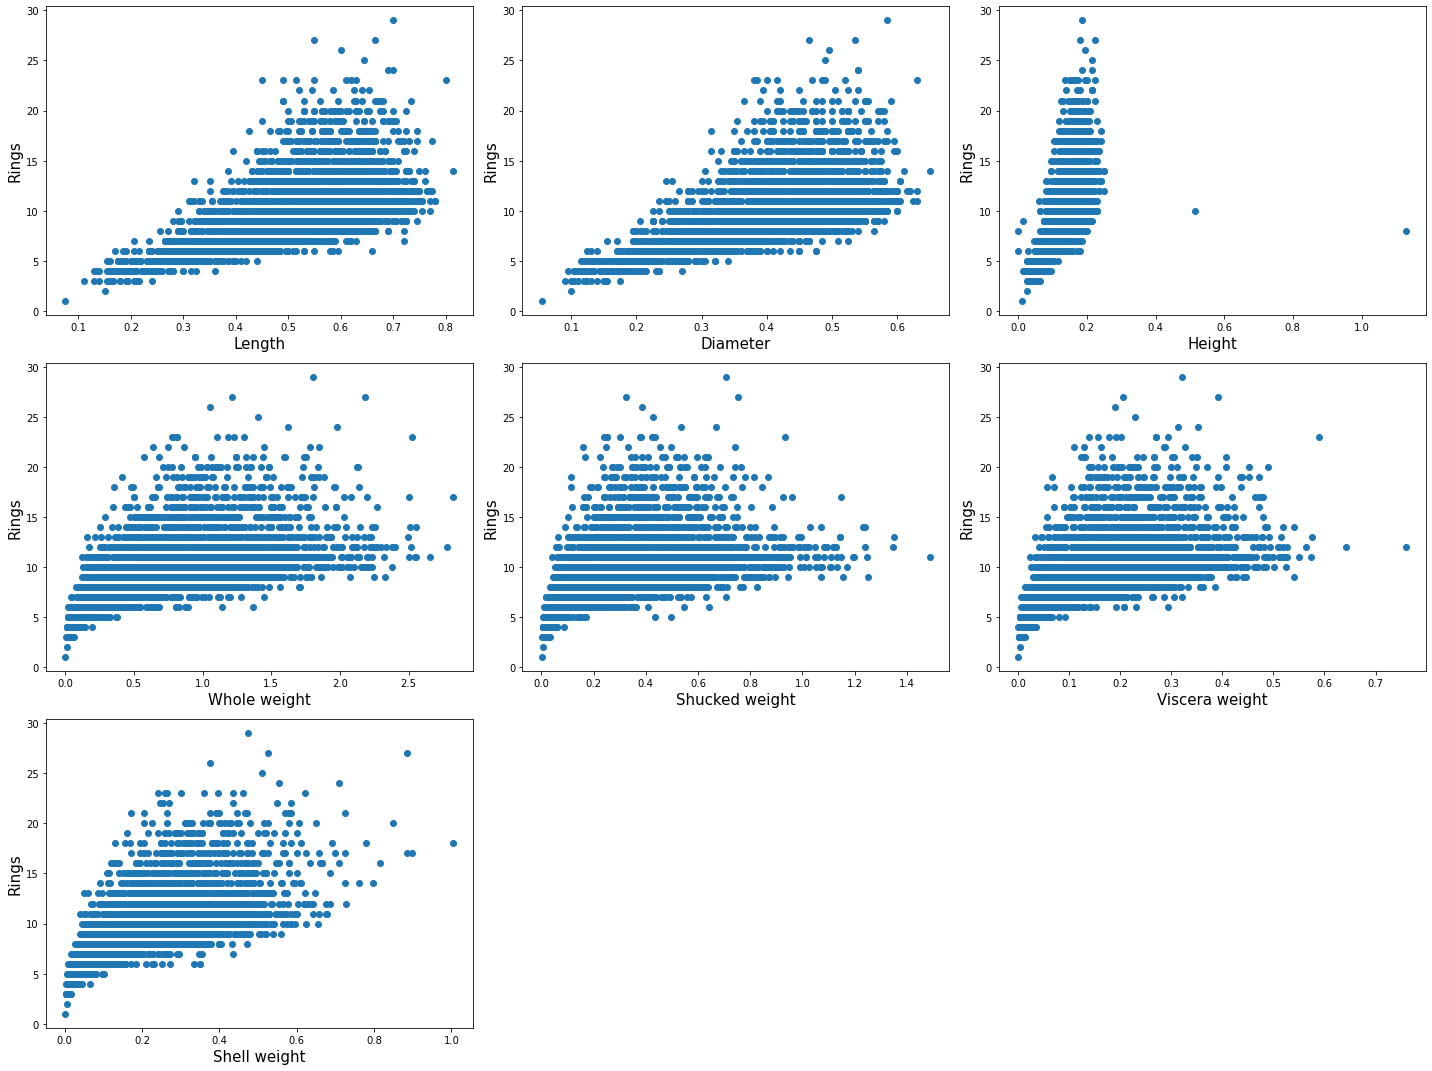

In [9]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in df_features:
    if plotnumber<=8:
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(df_features[column],y)
        plt.xlabel(column,fontsize=15)
        plt.ylabel('Rings',fontsize=15)
    plotnumber+=1
plt.tight_layout() 

Our target is to predict the number of rings on the basis of other observations. To do this we should visualize the relations of the other variables with the dependent variable 'Rings'. One way is to see that using scatter plot, which  shows scatter diagrams among the variables. From the above diagram we can see how the dependent variable ring is related to the other variables. We can see there are two outliers in the scatter diagram of rings and height, and some other kind of outliers are visible among other variables. It looks rings is linearly related with length , height, and diameter. The variables like 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight' have somewhat a linear relation also. But as variable 'Sex' is a categorical one we can't check it's relation with label data in scatterplot. Let's check it below:

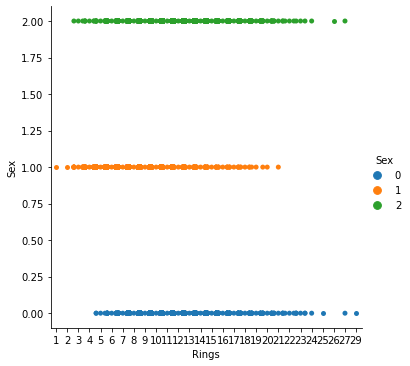

In [10]:
#Checking the relation between 'Sex' and 'Rings':

sns.catplot(x='Rings',y='Sex',data=df,hue='Sex',kind='swarm')


We can conclude by seeing the above diagram of relation of Sex and rings is that Infant has less rings(maximum-20)than male and female. Most of the male and female individuals are having less than 20 rings. Only few are having 24-29 rings. 

 Let's see the relations between Feature Vs Feature and Feature Vs Label:

<function matplotlib.pyplot.show(close=None, block=None)>

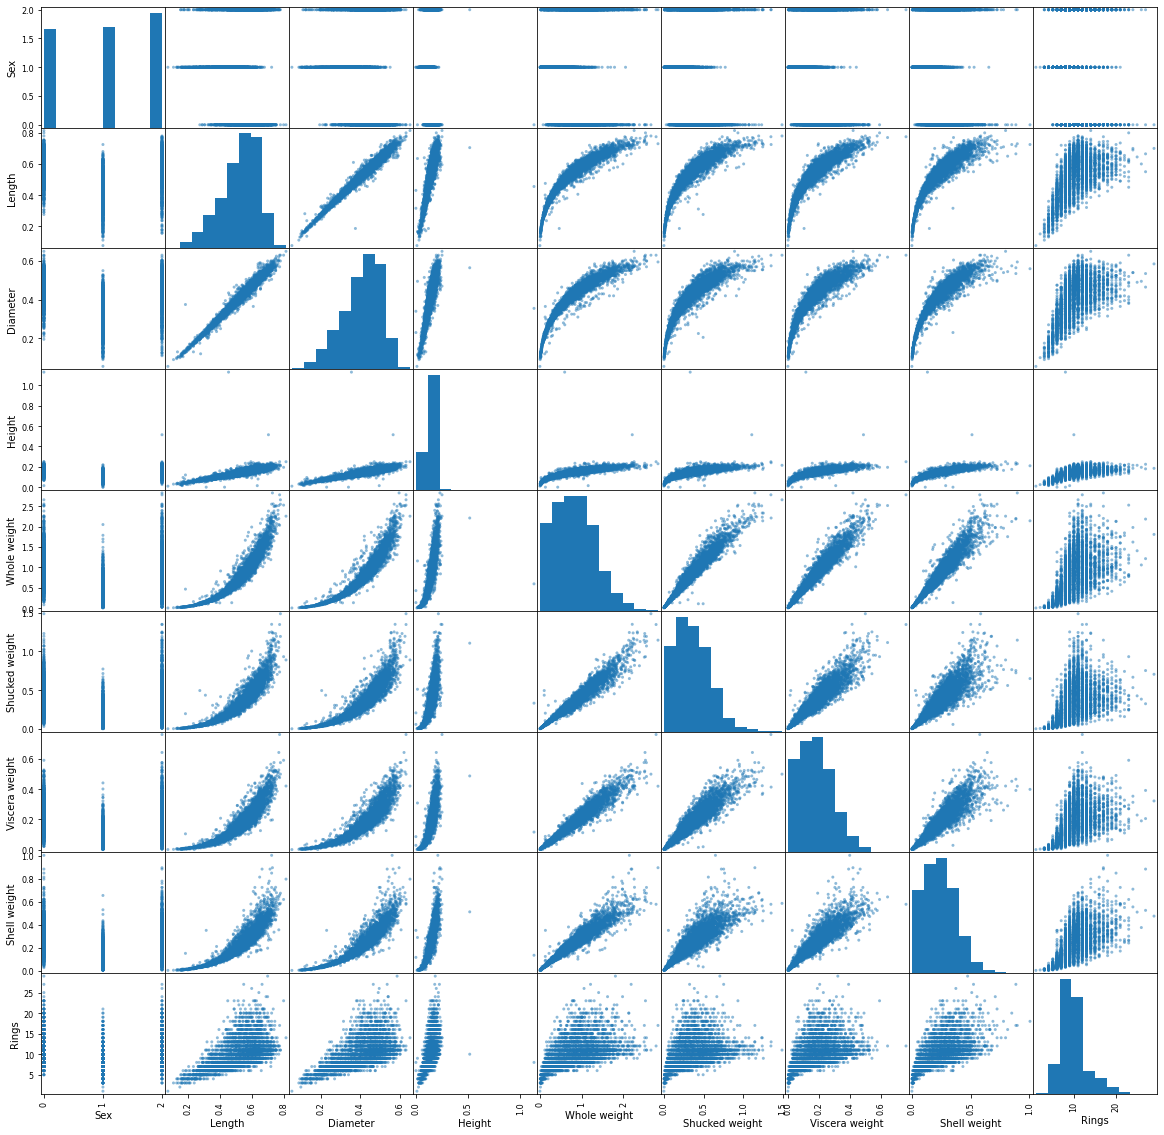

In [11]:
scatter_matrix(df,figsize=(20,20),diagonal='hist')
plt.show

We can see that the relations of rings with the variables length, diameter, and height looks linear but in different degrees. As we seen before Whole weight has correlation with Shell weight, visera weight,Shucked weight. maybe whole weight is the addidion of these 3 types of these weights. Rings can be seen linear with most of the variables, but we need to confirm it in order to be sure.

#### Multicolinearity Detection:
Let's find the coefficient of multicolinearty to check if any feature is correlated to another featue or not.

In [12]:
corr = df.corr()
corr

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


#### Heat Map (Correlation Matrix):
Let's plot the heat map to visualize and find coefficient of multicolinearity:

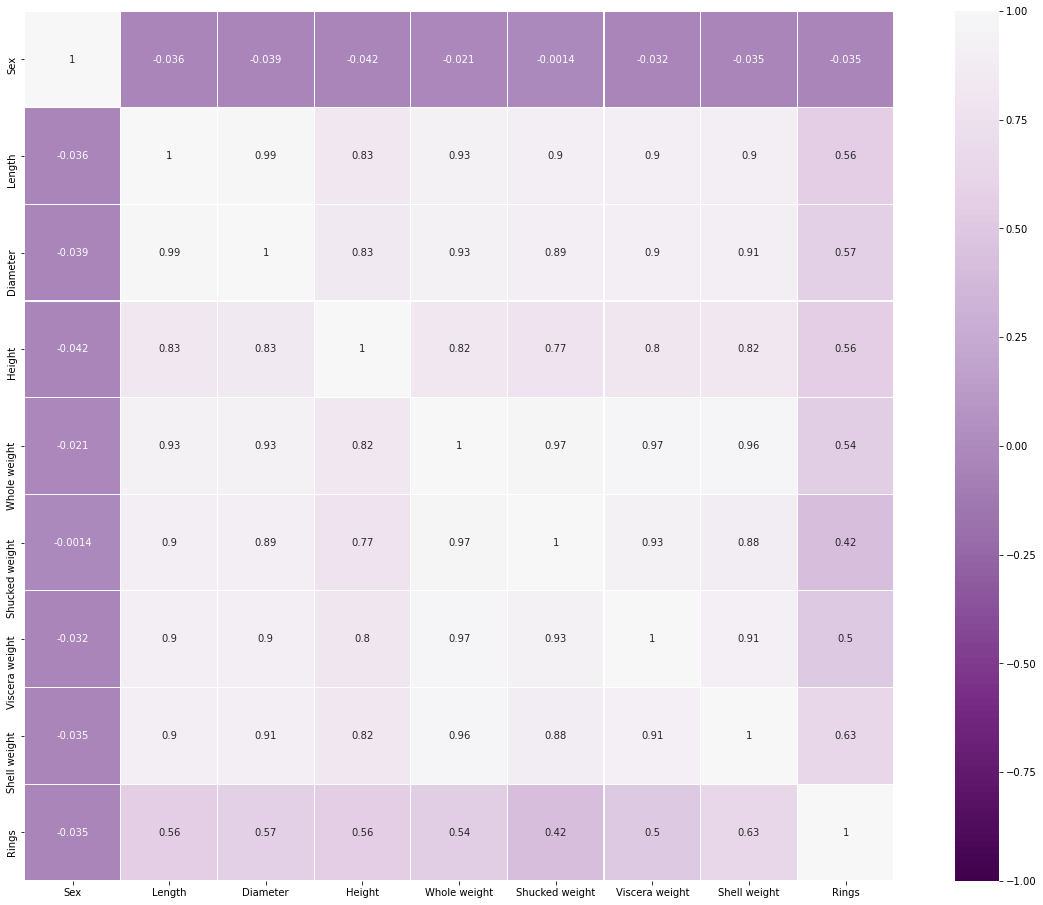

In [13]:
plt.figure(figsize=(22,16))
sns.heatmap(corr,cbar=True,cmap='PRGn',vmin=-1,vmax=1,square=True,fmt='.2g',annot=True,
            center=True,annot_kws={'size':10},linewidths=.1,linecolor='white')
plt.show()

after seeing the correlation matrix, first thing to note here is high correlation in data. There seems to be high multicollinearity between the independent variables.Like, correlation between Diameter and Length is extremely high(about 0.99), similarly Whole_weight seems to be highly correlated with other weight variables and maybe the whole weight is the sum of Shucked_weight, Viscera_weight and Shell_weight. Sex has least relation with the Label data.

Checking the columns which are positively negatively corelarted with the target columns:

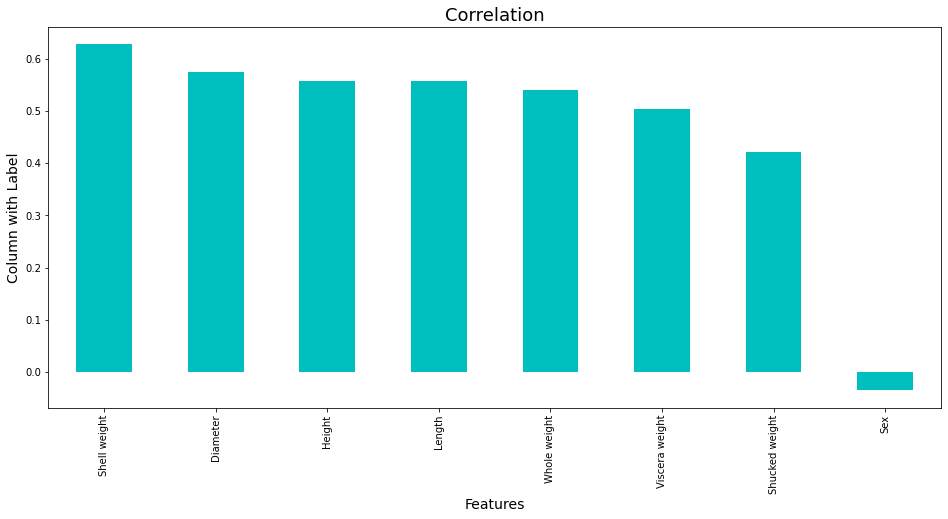

In [14]:
plt.figure(figsize=(16,7))
df.corr()['Rings'].sort_values(ascending=False).drop(['Rings']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Column with Label',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

So it can be seen that Sex has negative relation with Rings. And rest of the columns has more or less positive relation with Rings(Label).

#### Outlier Detection:

An outliers in a data can skew and mislead the training process of machine learning algorithms resulting in less accurate models and ultimately poor results, so we need to detect it and remove is as much as possible. Let's see how is our data looking:

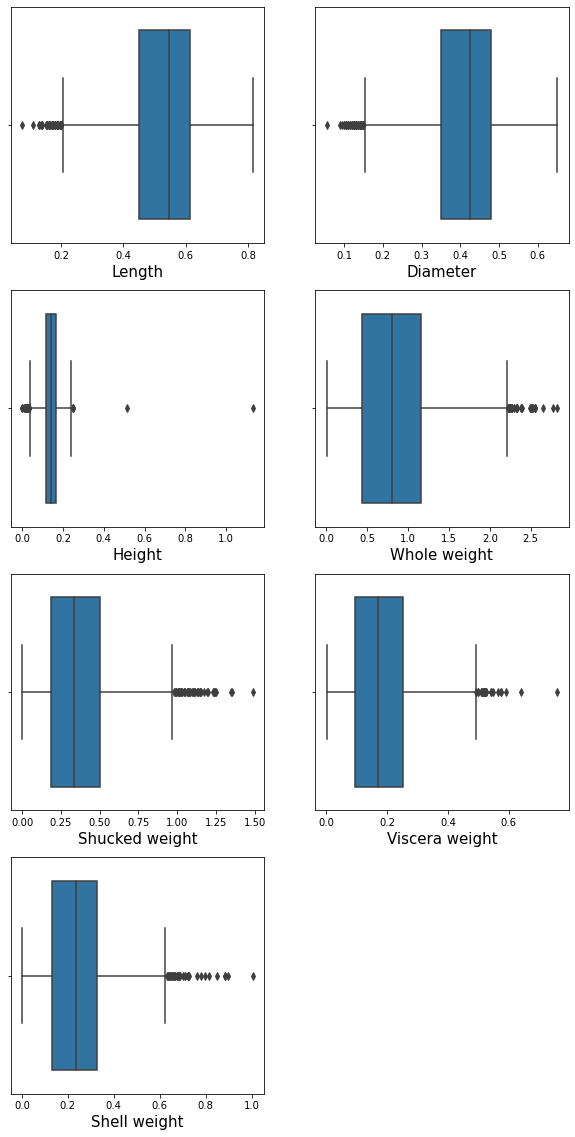

In [15]:
# Checking the outliers by using boxplot
plt.figure(figsize=(10,20))
graph=1
for column in df_features:
    if graph<=8:
        ax=plt.subplot(4,2,graph)
        sns.boxplot(df_features[column],)
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show() 

As we can see each and evey continuous variable is having outliers as we seen before in histogram diagram for checking skewness. And we need to treat these columns but we can't loose lots of data so we need to be careful.

### Data cleaning :

#### Outlier Removal:

Now by using Z-Score we will eliminate skewness from the data. By appling Z-score we are going to convert the dataset into Standard Normal distribution. Let's clean the skewness:


In [16]:
from scipy.stats import zscore

In [17]:
z_score = zscore(df[['Length','Diameter','Height',
                       'Whole weight','Shucked weight',
                       'Viscera weight', 'Shell weight']]) #converting data into standard normal distribution
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<2).all(axis=1)

df=df[filtering_entry]
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,3707.000000,3707.000000,3707.000000,3707.000000,3707.000000,3707.000000,3707.000000,3707.000000,3707.000000
mean,1.048557,0.525997,0.409405,0.138978,0.792120,0.343091,0.172752,0.228999,9.963852
std,0.824814,0.097634,0.081492,0.031871,0.396871,0.179276,0.089901,0.112436,2.963401
min,0.000000,0.285000,0.210000,0.060000,0.093500,0.031000,0.015000,0.027000,4.000000
25%,0.000000,0.460000,0.352500,0.115000,0.461750,0.195500,0.099000,0.135000,8.000000
50%,1.000000,0.540000,0.420000,0.140000,0.784000,0.329000,0.167000,0.228000,9.000000
75%,2.000000,0.605000,0.475000,0.165000,1.101500,0.480000,0.239000,0.310500,11.000000
max,2.000000,0.730000,0.590000,0.220000,1.808500,0.802000,0.399000,0.516500,29.000000


As we can see now that the minimum value of colum 'height' is 0.015 but before applying z-score it was 0.000 which is not possible for any organism's height. But in case of using z-score we should be carefull about data loss,

In [18]:
df.shape

(3707, 9)

So by using z-score we got the data percentage is: 4084/4177*100= 97.77 it seems we did not loose much data. So we are comfortable with this much of loss.

In [31]:
df.skew()

Sex              -0.090306
Length           -0.438035
Diameter         -0.422144
Height           -0.145494
Whole weight      0.189078
Shucked weight    0.290572
Viscera weight    0.289120
Shell weight      0.224801
Rings             1.305410
dtype: float64

As we can see after using still there skewness is present. But we can't afford more data loss. And in case of 'Sex' column as it is a categorical data we should'nt bother by it.

Let's check the continuous features after outlier removal:

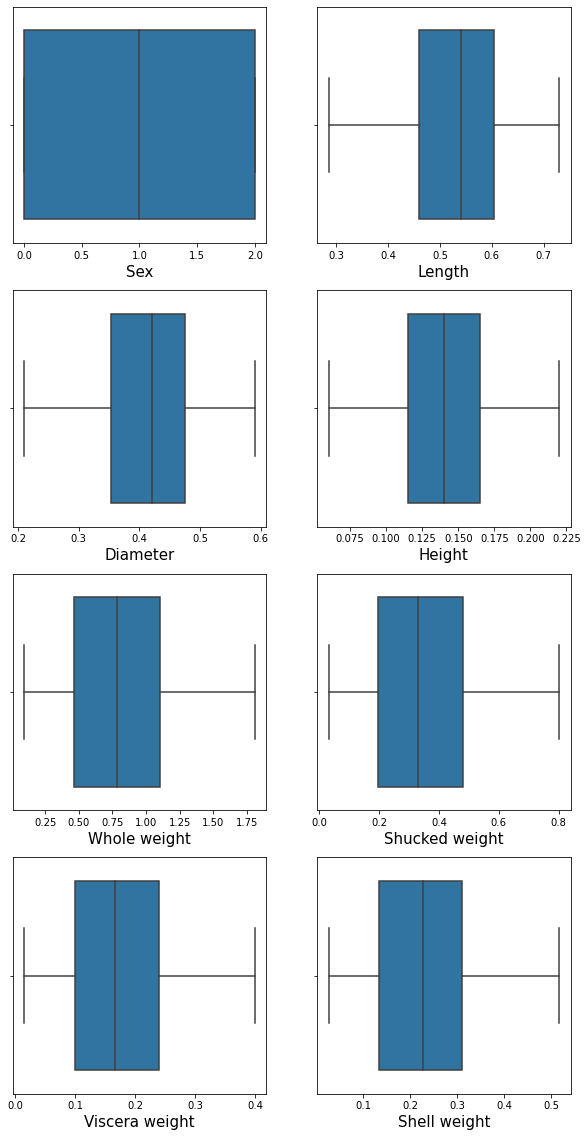

In [19]:
# Checking the outliers by using boxplot
plt.figure(figsize=(10,20))
graph=1
for column in df:
    if graph<=8:
        ax=plt.subplot(4,2,graph)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show() 

Sex is a categorical data as we seen before so we can't conclude anything regarding that data,according to skewness. Otherwise we have removed outliers from continuous features. We can loose that much only what we can afford. Now the feature data is looking good, let's Standardize:

#### Standardization:

Now we need to standardize the feature data as they are in different scales and We have already divided the dataset into features(x) and label(y).

In [20]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


##### VIF:
we need to check the correlation between features once again before the model training also. For that we are using VIF(Variance inflation factor).

In [21]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.010580,Sex
1,40.771963,Length
2,41.858341,Diameter
3,3.560886,Height
4,109.593589,Whole weight
5,28.434776,Shucked weight
6,17.367103,Viscera weight
7,21.258423,Shell weight


We can see there is so much correlation between Features, but as this dataset is containing only 8 features we can't loose a single feature.If there any huge overfitness is present, we can remove it by using Regularization techniques.

##### Hold Out Method:

Model will be built on Hold Out method(75/25 training and test split)to gauge how well the Regressor is working.

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=21)

### Model Creation:

Now we are going to build 6 different models. And let's check which one is giving us the best Accuray. Those models are:

1. Linear Regression
2. K-Neighbors Regressor
3. Support Vector Regression
4. Random Forest Regressor
5. Gradient Boosting Regressor 

##### 1. Linear Regression:

In [24]:
#Model Training:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [25]:
#Model Prediction with trained data:
y_lr_pred = lr.predict(x_train)

In [26]:
print("R Square Score of lr:",metrics.r2_score(y_train,y_lr_pred))

R Square Score of lr: 0.5253356411955906


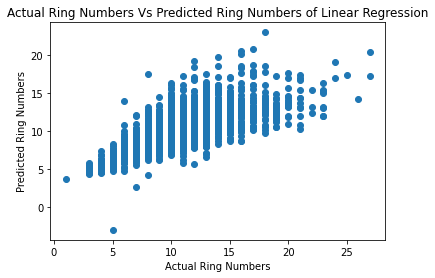

In [27]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_lr_pred)
plt.xlabel('Actual Ring Numbers')
plt.ylabel('Predicted Ring Numbers')
plt.title('Actual Ring Numbers Vs Predicted Ring Numbers of Linear Regression')
plt.show()

In [28]:
# Predicting test data with model:
y_test_lr_pred = lr.predict(x_test)

##### Evaluation of LinearRegression:

In [29]:
lr_accuracy = metrics.r2_score(y_test,y_test_lr_pred)
print("R Square Score of Linear Regression:",lr_accuracy)
print('Accuracy of LR :',lr_accuracy*100)

R Square Score of Linear Regression: 0.5296374881577061
Accuracy of LR : 52.96374881577061


In [30]:
print ('mean absolute error of linear regression is: ',mean_absolute_error(y_test,y_test_lr_pred))

mean absolute error of linear regression is:  1.6067455824185557


In [31]:
print ('mean squared error of linear regression is: ',mean_squared_error(y_test,y_test_lr_pred))

mean squared error of linear regression is:  5.106960353160462


In [32]:
print ('Root mean squared error of linear regression is: ',np.sqrt(mean_squared_error(y_test,y_test_lr_pred)))

Root mean squared error of linear regression is:  2.259858480781587


##### Scores of Linear Regression:

1. Accuracy - 52.96374881577061
2. MAE of LR -  1.6067455824185557
3. MSE of LR -  5.106960353160462
4. RMSE of LR -2.259858480781587

#### 2. K-Neighbors Regressor:

In [33]:
#Model Training:

kn = KNeighborsRegressor()
kn.fit(x_train,y_train)

KNeighborsRegressor()

In [34]:
#Model Prediction with trained data:
y_kn_pred = kn.predict(x_train)

In [35]:
print("R Square Score of kn:",metrics.r2_score(y_train,y_kn_pred))

R Square Score of kn: 0.6587961089594592


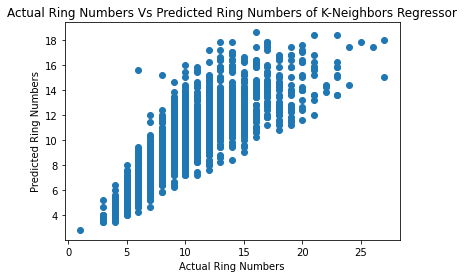

In [36]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_kn_pred)
plt.xlabel('Actual Ring Numbers')
plt.ylabel('Predicted Ring Numbers')
plt.title('Actual Ring Numbers Vs Predicted Ring Numbers of K-Neighbors Regressor')
plt.show()

In [37]:
# Predicting test data with model:
y_test_kn_pred = kn.predict(x_test)

##### Evaluation of K-Neighbors Regressor:

In [38]:
kn_accuracy = metrics.r2_score(y_test,y_test_kn_pred)
print("R Square Score of K-Neighbors Regressor:",kn_accuracy)
print('Accuracy of KNN :',kn_accuracy*100)

R Square Score of K-Neighbors Regressor: 0.5038218520224076
Accuracy of KNN : 50.38218520224076


In [39]:
print ('mean absolute error of K-Neighbors Regressor is: ',mean_absolute_error(y_test,y_test_kn_pred))

mean absolute error of K-Neighbors Regressor is:  1.6440191387559808


In [40]:
print ('mean squared error of K-Neighbors Regressor is: ',mean_squared_error(y_test,y_test_kn_pred))

mean squared error of K-Neighbors Regressor is:  5.387253588516747


In [41]:
print ('Root mean squared error of K-Neighbors Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_kn_pred)))

Root mean squared error of K-Neighbors Regressor is:  2.3210457962988897


##### Scores of K-Neighbors Regressor:

1.    Accuracy of KNN- 50.38218520224076
2.    MAE of KNN -  1.6440191387559808
3.    MSE of KNN - 5.387253588516747
4.    RMSE of KNN - 2.3210457962988897

#### 3. Support Vector Regression (SVR) :

In [42]:
#Model Training:
svr = SVR()
svr.fit(x_train,y_train)

SVR()

In [43]:
#Model Prediction with trained data:
y_svr_pred = kn.predict(x_train)

In [44]:
print("R Square Score of SVR:",metrics.r2_score(y_train,y_svr_pred))

R Square Score of SVR: 0.6587961089594592


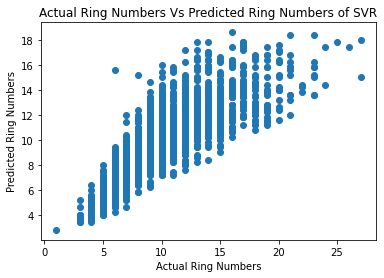

In [45]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_svr_pred)
plt.xlabel('Actual Ring Numbers')
plt.ylabel('Predicted Ring Numbers')
plt.title('Actual Ring Numbers Vs Predicted Ring Numbers of SVR')
plt.show()

In [46]:
# Predicting test data with model:
y_test_svr_pred = svr.predict(x_test)

##### Evaluation of SVR:

In [47]:
svr_accuracy = metrics.r2_score(y_test,y_test_svr_pred)
print("R Square Score of SVR:",svr_accuracy)
print('Accuracy of SVR :',svr_accuracy*100)

R Square Score of SVR: 0.5239089501527703
Accuracy of SVR : 52.390895015277025


In [48]:
print ('mean absolute error of SVR: ',mean_absolute_error(y_test,y_test_svr_pred))

mean absolute error of SVR:  1.519659699736748


In [49]:
print ('mean squared error of SVR is: ',mean_squared_error(y_test,y_test_svr_pred))

mean squared error of SVR is:  5.169157947008223


In [50]:
print ('Root mean squared error of SVR is: ',np.sqrt(mean_squared_error(y_test,y_test_svr_pred)))

Root mean squared error of SVR is:  2.2735782253989467


##### Scores of Support Vector Regression:

1.    Accuracy of SVR : 52.39089501527703
2.    MAE of SVR : 1.519659699736748
3.    MSE of SVR : 5.169157947008223
4.    RMSE of SVR : 2.2735782253989467

#### 4. Random Forest Regressor:

In [51]:
#Model Training:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [52]:
#Model Prediction with trained data:
y_rfr_pred = rfr.predict(x_train)

In [53]:
print("R Square Score of Random Forest Regressor:",metrics.r2_score(y_train,y_rfr_pred))

R Square Score of Random Forest Regressor: 0.935737835981514


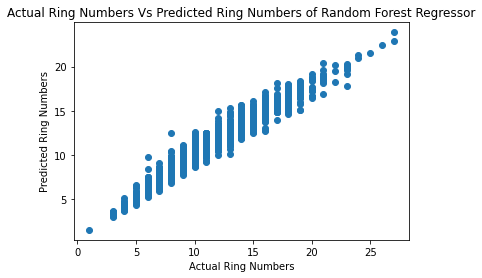

In [54]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_rfr_pred)
plt.xlabel('Actual Ring Numbers')
plt.ylabel('Predicted Ring Numbers')
plt.title('Actual Ring Numbers Vs Predicted Ring Numbers of Random Forest Regressor')
plt.show()

In [55]:
# Predicting test data with model:
y_test_rfr_pred = rfr.predict(x_test)

##### Evaluation of Random Forest Regressor:

In [56]:
rfr_accuracy = metrics.r2_score(y_test,y_test_rfr_pred)
print("R Square Score of Random Forest Regressor:",rfr_accuracy)
print('Accuracy of RFR :',rfr_accuracy*100)

R Square Score of Random Forest Regressor: 0.5442257847066543
Accuracy of RFR : 54.42257847066543


In [57]:
print ('mean absolute error of Random Forest Regressor: ',mean_absolute_error(y_test,y_test_rfr_pred))

mean absolute error of Random Forest Regressor:  1.554401913875598


In [58]:
print ('mean squared error of Random Forest Regressor is: ',mean_squared_error(y_test,y_test_rfr_pred))

mean squared error of Random Forest Regressor is:  4.948567942583732


In [59]:
print ('Root mean squared error of Random Forest Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_rfr_pred)))

Root mean squared error of Random Forest Regressor is:  2.224537691877513


##### Scores of Random Forest Regressor:

1.    Accuracy of RFR : 54.42257847066543
2.    MAE of RFR :  1.5516267942583732
3.    MSE of RFR : 4.948567942583732
4.    RMSE of RFR : 2.224537691877513


#### 5. Gradient Boosting Regressor:

In [60]:
# Model Training:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [61]:
#Model Prediction with trained data:
y_gbr_pred = gbr.predict(x_train)

In [62]:
print("R Square Score of Gradient Boosting Regressor:",metrics.r2_score(y_train,y_gbr_pred))

R Square Score of Gradient Boosting Regressor: 0.6643110143959177


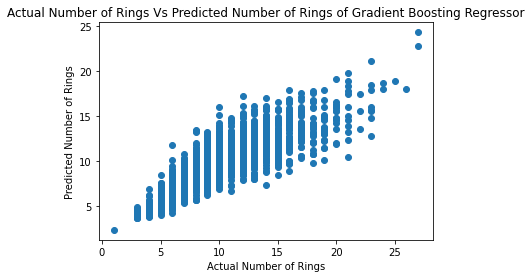

In [63]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_gbr_pred)
plt.xlabel('Actual Number of Rings')
plt.ylabel('Predicted Number of Rings')
plt.title('Actual Number of Rings Vs Predicted Number of Rings of Gradient Boosting Regressor')
plt.show()

In [64]:
# Predicting test data with model:
y_test_gbr_pred = gbr.predict(x_test)

##### Evaluation of Gradient Boosting Regressor:

In [65]:
gbr_accuracy = metrics.r2_score(y_test,y_test_gbr_pred)
print("R Square Score of Gradient Boosting Regressor:",gbr_accuracy)
print('Accuracy of GBR :',gbr_accuracy*100)

R Square Score of Gradient Boosting Regressor: 0.5445281740284769
Accuracy of GBR : 54.452817402847685


In [66]:
print ('mean absolute error of Gradient Boosting Regressor: ',mean_absolute_error(y_test,y_test_gbr_pred))

mean absolute error of Gradient Boosting Regressor:  1.5247585991921042


In [67]:
print ('mean squared error of Gradient Boosting Regressor is: ',mean_squared_error(y_test,y_test_gbr_pred))

mean squared error of Gradient Boosting Regressor is:  4.945284750920097


In [68]:
print ('Root mean squared error of Gradient Boosting Regressor: ',np.sqrt(mean_squared_error(y_test,y_test_gbr_pred)))

Root mean squared error of Gradient Boosting Regressor:  2.2237996202266284


##### Scores of Gradient Boosting Regressor:

1.    Accuracy of GBR : 54.452817402847685
2.    MAE of GBR : 1.524023056225044
3.    MSE of GBR : 4.935799880757378
4.    RMSE of GBR : 2.221666014673983


##### Regulalization:
By using Regression models to train some data,there is a good chance the model will overfit the given training dataset. Regularization helps to sort this overfitting problem by restricting the degrees of freedom of a given equation i.e simply reducing the number of degrees of a polynominal function by reducing their corresponding weights. Regularization constraints the weights of features to avoid overfitting.

##### Regularization using Lasso:

In [69]:
lasscv = LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [70]:
#best alpha parameter
alpha = lasscv.alpha_
alpha

3.574976444462216e-05

In [71]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=3.574976444462216e-05)

In [72]:
lasso_reg.score(x_test,y_test)

0.5296347958509493

##### Regularization Using Ridge:

In [73]:
ridgecv = RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [74]:
ridge_alpha= ridgecv.alpha_
ridge_alpha

0.001

In [75]:
ridge_model = Ridge(ridge_alpha)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [76]:
ridge_model.score(x_test,y_test)

0.5296373891502286

Both Lasso and Ridge is giving score of 0.529 as Most of the Models. Let's check overfitting once again using Cross Validation.

#### Evaluating with Cross Validation:

Cross validation is widely used technique to evaluate the performance of Machine Learning Models. Cross Validation divides the data into parts, where one set is used for traning and other is used for testing purpose. And by applying CV, we can understand if our model is overfitting on training data or not.

#### CV of Linear Regression:

In [77]:
lr_cv_score = cross_val_score(lr,x_train,y_train,cv=5,scoring='r2')
print(lr_cv_score)
print('mean :',lr_cv_score.mean()*100)

[0.57310921 0.51069895 0.43311964 0.50054652 0.52828079]
mean : 50.91510213700011


#### CV of K-Neighbors Regressor:

In [78]:
kn_cv_score = cross_val_score(kn,x_train,y_train,cv=5,scoring='r2')
print(kn_cv_score)
print('mean :',kn_cv_score.mean()*100)

[0.50426293 0.4634974  0.4810856  0.47758025 0.49613126]
mean : 48.45114883483495


#### CV of SVR:

In [79]:
svr_cv_score = cross_val_score(svr,x_train,y_train,cv=5,scoring='r2')
print(svr_cv_score)
print('mean :',svr_cv_score.mean()*100)

[0.5628997  0.52413458 0.53713533 0.52829858 0.54149165]
mean : 53.87919692115869


#### CV of Random Forest Regressor:

In [80]:
rfr_cv_score = cross_val_score(rfr,x_train,y_train,cv=5,scoring='r2')
print(rfr_cv_score)
print('mean :',rfr_cv_score.mean()*100)

[0.59997842 0.52354482 0.5229147  0.54098752 0.51495368]
mean : 54.04758257932309


#### CV of Gradient Boosting Regressor:

In [81]:
gbr_cv_score = cross_val_score(gbr,x_train,y_train,cv=5,scoring='r2')
print(gbr_cv_score)
print('mean :',gbr_cv_score.mean()*100)

[0.59626247 0.53054408 0.50962399 0.51574214 0.54446664]
mean : 53.93278646210315


#### Selection of the best model for Abalone Age Prediction:
Now as we are bit confused as most of the models are showing almost same accuracy. Now let's check the difference between Acuuracy Scores and Cross Validation Scores of the models to select the best model out of 5 models.

1. LR = 52.963-50.915 = 2.048, 
2. KN = 50.382-48.451 = 1.931, 
3. SVR = 52.390-53.879 = -1.489,
4. RFR = 54.422-54.047 = 0.375, 
5. GBR = 54.452-53.932= 0.52

##### Observation:
Overall the result of all models are very low. As most of the Accuracy of the Models are between 50-55%.
So, as the difference of Accuracy Score and CV of Random Forest Regressor is least, it's the best Model according to the result.

##### Some words about Random Forest: 
As Random Forest makes tweak in the working algorithm of bagging model to decrease the correlation in the trees. The idea is to more randomness while creating trees which will helpful in reducing correlation. 

##### Hyperparameter Tuning:
Now we will use Randomized Search Technique to tune the hyperparameter of Random forest Regressor. After getting the best parameters we can put those into the model to obtain the best result.

In [118]:
rfr = RandomForestRegressor()
params={'n_estimators':[x for x in range(10,100)],
        'criterion': ['mse','mae'],
       'max_features':['auto', 'sqrt','log2'],
       'max_depth':[x for x in range(1,20)],
       'min_samples_split':[0.1,1.0,10],
       'min_samples_leaf':[1,3,4]}

rnd_srch= RandomizedSearchCV(rfr,cv=5,param_distributions=params)
rnd_srch.fit(x_train,y_train)
rnd_srch.best_estimator_

RandomForestRegressor(max_depth=11, max_features='log2', min_samples_leaf=3,
                      min_samples_split=10, n_estimators=32)

In [83]:
rfr = RandomForestRegressor(max_depth=11,max_features='log2',min_samples_leaf=3, min_samples_split=10,
                          n_estimators=32) 
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)

In [120]:
print("*** Accuracy Post Tuning***")
print(metrics.r2_score(y_test,y_pred)*100)

*** Accuracy Post Tuning***
54.41518629669131


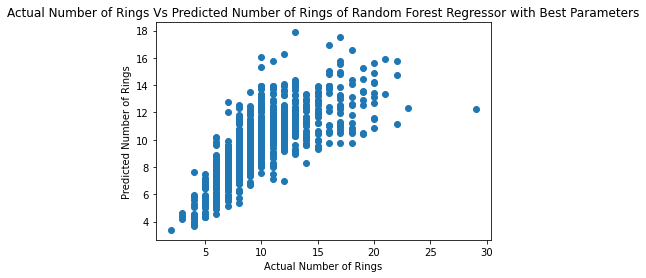

In [85]:
# Checking Actual Vs Predicted using Graph after Hyperparameter tuning:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Number of Rings')
plt.ylabel('Predicted Number of Rings')
plt.title('Actual Number of Rings Vs Predicted Number of Rings of Random Forest Regressor with Best Parameters')
plt.show()

###### As we can see Random Forest Regressor even after hyperparameter tuning with Randomized SearchCV gives almost the same result(54.41) as without tuning. So, we are going to save Random Forest Regressor Model for Abalone Age prediction.

In [87]:
# model prediction using Linear Regression
x_predict = list(rfr.predict(x_test))
rfr_abalone = {'predicted_values':x_predict,'orignal_values':y_test}
print(pd.DataFrame(rfr_abalone))

      predicted_values  orignal_values
1189         11.000441              12
342          10.495328              12
1581          8.811418               8
3021          9.278362               9
3325          8.089118              10
...                ...             ...
1569         10.462243               8
295           7.067853               6
2381          4.322255               5
3811          8.796430               9
4130         10.713197              10

[1045 rows x 2 columns]


In [89]:
#import joblib
import joblib

joblib.dump(rfr,'rfr_abalone.obj')

# SAVING THE MODEL 

['rfr_abalone.obj']

In [90]:
rfr_from_joblib=joblib.load('rfr_abalone.obj')
rfr_from_joblib.predict(x_test)

#TESTING THE SAVED MODEL

array([11.00044063, 10.4953284 ,  8.81141795, ...,  4.32225538,
        8.79642971, 10.71319738])

#### Conclusion:

As the problem statement states that manually the Age Prediction of Abalone is time consuming process. The given dataset is cotaining 4177 numbers of Abalone. And 9 types of features have been given us to predict the right Age. The problem statement has also been stated that the ring numbers +1.5 gives the age in years of an Abalone, like if an Abalone has 6 rings,maybe it's age is : 7.5 (i.e 6+1.5=7.5) So, by analyzing the different data or features we can check the relation between those feature data with number of rings and by doing that we can predict the right age of an Abalone using Machine Learning Algorithms. 
We have analyzed the data several times with several different techniques and after that we can say in this case more feature will be helpful as other than these 8 features there should be some more features of abalone that can be related to its age as Abalone is an living Organism.
After analyzing and creating model using 5 different algoritms, we have seen that most of the algorithms given us 52-55% of accuracy score after removing outliers also. Random Forest Regressor has given us the best result i.e 54%. And after Hyperparameter Tuning it is showed us almost the same result.
This analysis indicates that we do not need to count the number of rings using microscopic experiment. In other words, we do not need any laboratory experiment to predict the age of abalones. We just need more features of an Abalone to get the perfect result.

